Colocar a frequencia anual pela quantidade de vezes que o veiculo passa pela frequencia, gerar anual

Agrupamento origem destino pesquisa OD

![frequencia](C:\Users\lucas\Desktop\ufrpe\arq\alerta-pandemia\estimativo.png)

In [74]:
import pandas as pd
df = pd.read_excel("PesquisaOD_2016_2017.xlsx", sheet_name=['BD_1PNT2016','BD_2PNT2016'])
#Separando abas do arquivo
df2 = df ['BD_1PNT2016']
df3 = df['BD_2PNT2016']

#*classe* e frequencia
df_merged = pd.concat([df2, df3])
df_merged = df_merged.loc[:, [ 'POrigem', 'MOrigem', 'UFOrigem','GeocodOrigem', 'PDestino', 'MDestino', 'UFDestino','GeocodDestino','Classe', 'QtdPessoasVeic']] 

#Retirando origens e destinos que são diferentes do Brasil
df_merged = df_merged.drop(df_merged[df_merged['PDestino'] != 'Brasil'].index)
df_merged = df_merged.drop(df_merged[df_merged['POrigem'] != 'Brasil'].index)
df_merged['FreqQnt'] = df_merged['FreqQnt'].replace('>10', 10)



# Realizar o agrupamento e a soma
df_agrupado = df_merged.groupby(['GeocodOrigem']).agg({'MOrigem':'max','UFOrigem' :'max','MDestino':'max','UFDestino' :'max'})

#'QtdPessoasVeic':'sum',

# Resultado final
display(df_agrupado)


TypeError: '>=' not supported between instances of 'str' and 'float'

In [ ]:
df_agrupado.head(30)

MOrigem UFOrigem  \
GeocodOrigem GeocodDestino                                   
1100015.0    1100023.0      Alta Floresta D'Oeste       RO   
             1100122.0      Alta Floresta D'Oeste       RO   
             1100189.0      Alta Floresta D'Oeste       RO   
             1100205.0      Alta Floresta D'Oeste       RO   
             1100288.0      Alta Floresta D'Oeste       RO   
             1100304.0      Alta Floresta D'Oeste       RO   
             1101484.0      Alta Floresta D'Oeste       RO   
             1101757.0      Alta Floresta D'Oeste       RO   
             1200013.0      Alta Floresta D'Oeste       RO   
             3102803.0      Alta Floresta D'Oeste       RO   
             3303807.0      Alta Floresta D'Oeste       RO   
             3550308.0      Alta Floresta D'Oeste       RO   
             4102505.0      Alta Floresta D'Oeste       RO   
             4104303.0      Alta Floresta D'Oeste       RO   
             4209003.0      Alta Floresta D'Oeste       RO   
             5102504.0      Alta Floresta D'Oeste       RO   
             5103403.0      Alta Floresta D'Oeste       RO   
             5103809.0      Alta Floresta D'Oeste       RO   
             5106315.0      Alta Floresta D'Oeste       RO   
1100023.0    1100015.0                  Ariquemes       RO   
             1100023.0                  Ariquemes       RO   
             1100049.0                  Ariquemes       RO   
             1100080.0                  Ariquemes       RO   
             1100098.0                  Ariquemes       RO   
             1100106.0                  Ariquemes       RO   
             1100114.0                  Ariquemes       RO   
             1100122.0                  Ariquemes       RO   
             1100130.0                  Ariquemes       RO   
             1100189.0                  Ariquemes       RO   
             1100205.0                  Ariquemes       RO   

                                         MDestino UFDestino  
GeocodOrigem GeocodDestino                                   
1100015.0    1100023.0                  Ariquemes        RO  
             1100122.0                  Ji-Paraná        RO  
             1100189.0              Pimenta Bueno        RO  
             1100205.0                Porto Velho        RO  
             1100288.0             Rolim de Moura        RO  
             1100304.0                    Vilhena        RO  
             1101484.0         São Felipe D'Oeste        RO  
             1101757.0              Vale do Anari        RO  
             1200013.0                 Acrelândia        AC  
             3102803.0                Andrelândia        MG  
             3303807.0                     Paraty        RJ  
             3550308.0                  São Paulo        SP  
             4102505.0             Barbosa Ferraz        PR  
             4104303.0               Campo Mourão        PR  
             4209003.0                    Joaçaba        SC  
             5102504.0                    Cáceres        MT  
             5103403.0                     Cuiabá        MT  
             5103809.0      Figueirópolis D'Oeste        MT  
             5106315.0         Novo Santo Antônio        MT  
1100023.0    1100015.0      Alta Floresta D'Oeste        RO  
             1100023.0                  Ariquemes        RO  
             1100049.0                     Cacoal        RO  
             1100080.0              Costa Marques        RO  
             1100098.0            Espigão D'Oeste        RO  
             1100106.0              Guajará-Mirim        RO  
             1100114.0                       Jaru        RO  
             1100122.0                  Ji-Paraná        RO  
             1100130.0         Machadinho D'Oeste        RO  
             1100189.0              Pimenta Bueno        RO  
             1100205.0                Porto Velho        RO

Considerar eventualmente como unitário

Filtrar considerar_parOD = 1 e considerar_socio = 1 

Fazer a normalização anual antes do agrupamento *Origem*

Exibir: Origem, Destino, Classe(Veiculo), Frequencia(ano), Quantidade de pessoas(ano)

Agrupar mesmo par origem destino por *classe*

In [ ]:
# Normalização da frequencia anual!

df_merged2 = pd.concat([df2, df3])

df_merged2 = df_merged2.loc[:, [ 'POrigem', 'MOrigem', 'UFOrigem','GeocodOrigem', 'PDestino', 'MDestino', 'UFDestino','GeocodDestino', 'FreqPeriodo','FreqQnt','Classe', 'QtdPessoasVeic','considerar_parOD?','considerar_socio?']] 

#Retirando origens e destinos que são diferentes do Brasil
df_merged2 = df_merged2.drop(df_merged2[df_merged2['PDestino'] != 'Brasil'].index)
df_merged2 = df_merged2.drop(df_merged2[df_merged2['POrigem'] != 'Brasil'].index)
df_merged2 = df_merged2.drop(df_merged2[df_merged2['FreqPeriodo'] == 'Informação não registrada'].index)
df_merged2 = df_merged2.drop(df_merged2[df_merged2['QtdPessoasVeic'] == 'Informação não registrada'].index)
df_merged2 = df_merged2.drop(df_merged2[df_merged2['considerar_parOD?'] == '0'].index)
df_merged2 = df_merged2.drop(df_merged2[df_merged2['considerar_socio?'] == '0'].index)
df_merged2 = df_merged2.dropna(subset=['QtdPessoasVeic'])
df_merged2['FreqQnt'] = df_merged2['FreqQnt'].replace('>10', 10)

#Calculando frequencias
def multiplicar_frequencia(row):
    quantidade_pessoas = row['QtdPessoasVeic']
    frequencia = row['FreqPeriodo']
    frequenciaQtd = row['FreqQnt']

    if frequencia == 'Semana':
        return quantidade_pessoas*(frequenciaQtd * 52) 
    elif frequencia == 'Dia':
        return quantidade_pessoas*(frequenciaQtd * 365)
    elif frequencia == 'Mes':
        return quantidade_pessoas*(frequenciaQtd * 12)
    else: #ano ou eventualmente!
        return quantidade_pessoas

df_merged2['TotalPessoas_Ano'] = df_merged2.apply(multiplicar_frequencia, axis=1)
dfRes = df_merged2.loc[:, ['MOrigem', 'UFOrigem','GeocodOrigem','MDestino', 'UFDestino','GeocodDestino', 'FreqPeriodo','FreqQnt','Classe', 'QtdPessoasVeic','TotalPessoas_Ano']] 
display(dfRes)

,MOrigem,UFOrigem,GeocodOrigem,MDestino,UFDestino,GeocodDestino,FreqPeriodo,FreqQnt,Classe,QtdPessoasVeic,TotalPessoas_Ano
0,Seberi,RS,4320206.0,Tramandaí,RS,4321600.0,Mês,1,P3,2,2
1,São José do Inhacorá,RS,4318499.0,Seberi,RS,4320206.0,Mês,1,P3,2,2
3,Palmitinho,RS,4313805.0,Jaboticaba,RS,4310850.0,Mês,1,P1,3,3
4,Seberi,RS,4320206.0,Palmeira das Missões,RS,4313706.0,Semana,1,P3,2,104
5,Pinheirinho do Vale,RS,4314498.0,Esteio,RS,4307708.0,Ano,1,P1,3,3
...,...,...,...,...,...,...,...,...,...,...,...
296931,Colinas,MA,2103505.0,Passagem Franca,MA,2107902.0,Dia,2,M,2,1460
296933,Colinas,MA,2103505.0,Parnarama,MA,2107803.0,Semana,1,P1,3,156
296934,São Luis,MA,2111300.0,São João dos Patos,MA,2111102.0,Mês,1,M,1,1
296935,Colinas,MA,2103505.0,Parnarama,MA,2107803.0,Dia,1,P1,2,730


In [ ]:
#'MOrigem', 'UFOrigem','GeocodOrigem','MDestino', 'UFDestino','GeocodDestino', 'FreqPeriodo','FreqQnt','Classe', 'QtdPessoasVeic','TotalPessoas_Ano'
# Realizar o agrupamento e a soma
dfRes.to_csv('AnualGeral.csv', index=False)

fatores = [ 'O1','O2','O3','P2']

# Filtrar os valores da coluna com base nos transportes
DFfiltrado = dfRes[dfRes['Classe'].isin(fatores)]

DFagrup = dfRes.groupby(['GeocodOrigem','Classe']).agg({'MOrigem':'first','UFOrigem' :'first','MDestino':'first','UFDestino' :'first','GeocodDestino':'first','TotalPessoas_Ano':'sum'})
DFfiltrado = DFfiltrado.groupby(['GeocodOrigem','Classe']).agg({'MOrigem':'first','UFOrigem' :'first','MDestino':'first','UFDestino' :'first','GeocodDestino':'first','TotalPessoas_Ano':'sum'})

display(DFagrup)
display(DFfiltrado)
DFagrup.to_csv('AnualAgrupado.csv', index=True)
DFfiltrado.to_csv('OnibusAgrupado.csv', index=True)

MOrigem UFOrigem         MDestino  \
GeocodOrigem Classe                                                    
1100015.0    M       Alta Floresta D'Oeste       RO        Ji-Paraná   
             P1      Alta Floresta D'Oeste       RO           Cuiabá   
             P3      Alta Floresta D'Oeste       RO    Vale do Anari   
1100023.0    M                   Ariquemes       RO        Ariquemes   
             O1                  Ariquemes       RO          Cujubim   
...                                    ...      ...              ...   
5300108.0    O1                   Brasília       DF         Curitiba   
             O2                   Brasília       DF    Florianópolis   
             P1                   Brasília       DF          Corumbá   
             P2                   Brasília       DF  Nova Petrópolis   
             P3                   Brasília       DF           Bonito   

                    UFDestino  GeocodDestino  TotalPessoas_Ano  
GeocodOrigem Classe                                             
1100015.0    M             RO      1100122.0               104  
             P1            MT      5103403.0                29  
             P3            RO      1101757.0               312  
1100023.0    M             RO      1100023.0            163337  
             O1            RO      1100940.0            153034  
...                       ...            ...               ...  
5300108.0    O1            PR      4106902.0             42043  
             O2            SC      4205407.0             37329  
             P1            MS      5003207.0            142696  
             P2            RS      4313201.0              1681  
             P3            MS      5002209.0             17580  

[11420 rows x 6 columns]

MOrigem UFOrigem              MDestino UFDestino  \
GeocodOrigem Classe                                                       
1100023.0    O1      Ariquemes       RO               Cujubim        RO   
             O2      Ariquemes       RO         Guajará-Mirim        RO   
             O3      Ariquemes       RO           Porto Velho        RO   
             P2      Ariquemes       RO          Alto Paraíso        RO   
1100049.0    O2         Cacoal       RO      Pontes e Lacerda        MT   
...                        ...      ...                   ...       ...   
5221601.0    O1         Uruaçu       GO                Uruaçu        GO   
             P2         Uruaçu       GO  Nova Iguaçu de Goiás        GO   
5300108.0    O1       Brasília       DF              Curitiba        PR   
             O2       Brasília       DF         Florianópolis        SC   
             P2       Brasília       DF       Nova Petrópolis        RS   

                     GeocodDestino  TotalPessoas_Ano  
GeocodOrigem Classe                                   
1100023.0    O1          1100940.0            153034  
             O2          1100106.0                14  
             O3          1100205.0                52  
             P2          1100403.0             18982  
1100049.0    O2          5106752.0             51501  
...                            ...               ...  
5221601.0    O1          5221601.0            368115  
             P2          5214879.0             34915  
5300108.0    O1          4106902.0             42043  
             O2          4205407.0             37329  
             P2          4313201.0              1681  

[2383 rows x 6 columns]

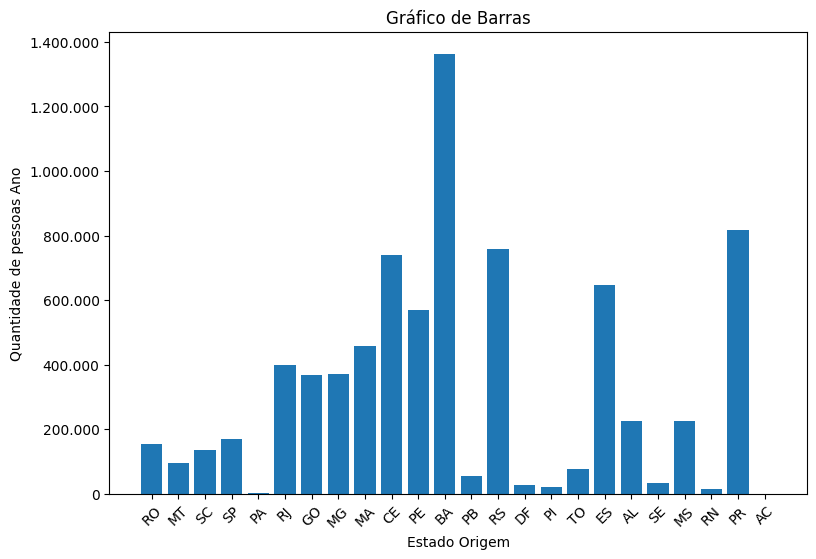

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker



# Plotar gráfico de barras
plt.figure(figsize=(9, 6))
plt.bar(DFfiltrado['UFDestino'], DFfiltrado['TotalPessoas_Ano'])
plt.xlabel('Estado Destino')
plt.ylabel('Quantidade de pessoas Ano')
plt.title('Gráfico de Barras')
plt.xticks(rotation=45)

#Tirar formatação dos numeros
plt.ticklabel_format(style='plain', axis='y')
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x).replace(',', '.'))
plt.gca().get_yaxis().set_major_formatter(formatter)

plt.show()

*Frequencia semanal* frequencia de saida de veiculo e total de pessoas

FreqQtd, FreqPeriodo e total de pessoas 

Pesquisar formas de comparar os dados!

scatter plot com cada origem destino e pra cada estado

Tableau

Pandas

In [ ]:
# Normalização da frequencia anual!

DFmerged3 = pd.concat([df2, df3])

DFmerged3 = DFmerged3.loc[:, [ 'POrigem', 'MOrigem', 'UFOrigem','GeocodOrigem', 'PDestino', 'MDestino', 'UFDestino','GeocodDestino', 'FreqPeriodo','FreqQnt','Classe', 'QtdPessoasVeic','considerar_parOD?','considerar_socio?']] 

#Retirando origens e destinos que são diferentes do Brasil
DFmerged3 = DFmerged3.drop(DFmerged3[DFmerged3['PDestino'] != 'Brasil'].index)
DFmerged3 = DFmerged3.drop(DFmerged3[DFmerged3['POrigem'] != 'Brasil'].index)
DFmerged3 = DFmerged3.drop(DFmerged3[DFmerged3['FreqPeriodo'] == 'Informação não registrada'].index)
DFmerged3 = DFmerged3.drop(DFmerged3[DFmerged3['QtdPessoasVeic'] == 'Informação não registrada'].index)
DFmerged3 = DFmerged3.drop(DFmerged3[DFmerged3['considerar_parOD?'] == '0'].index)
DFmerged3 = DFmerged3.drop(DFmerged3[DFmerged3['considerar_socio?'] == '0'].index)
DFmerged3 = DFmerged3.dropna(subset=['QtdPessoasVeic'])
DFmerged3['FreqQnt'] = DFmerged3['FreqQnt'].replace('>10', 10)

#Calculando frequencias
def multiplicarfrequencia(row):

    frequencia = row['FreqPeriodo']
    frequenciaQtd = row['FreqQnt']

    if frequencia == 'Semana':
        return  frequenciaQtd
    elif frequencia == 'Dia':
        return (frequenciaQtd * 7)
    elif frequencia == 'Mes':
        return (frequenciaQtd / 4)
    else: #ano ou eventualmente!
        return (frequenciaQtd / 52)

DFmerged3['FreqSem'] = DFmerged3.apply(multiplicarfrequencia, axis=1)
dfRes3 = DFmerged3.loc[:, ['MOrigem', 'UFOrigem','GeocodOrigem','MDestino', 'UFDestino','GeocodDestino', 'FreqPeriodo','FreqQnt','Classe','FreqSem', 'QtdPessoasVeic']] 
display(dfRes3)

#'MOrigem', 'UFOrigem','GeocodOrigem','MDestino', 'UFDestino','GeocodDestino', 'FreqPeriodo','FreqQnt','Classe', 'QtdPessoasVeic'
# Realizar o agrupamento e a soma
dfRes3.to_csv('AnualGeral.csv', index=False)

fatores3 = [ 'O1','O2','O3','P2']

# Filtrar os valores da coluna com base nos transportes
DFfiltrado3 = dfRes3[dfRes3['Classe'].isin(fatores3)]

DFagrup3 = dfRes3.groupby(['GeocodOrigem','Classe']).agg({'MOrigem':'first','UFOrigem' :'first','MDestino':'first','UFDestino' :'first','GeocodDestino':'first','FreqSem':'sum','QtdPessoasVeic':'sum'})
DFfiltrado3 = DFfiltrado3.groupby(['GeocodOrigem','Classe']).agg({'MOrigem':'first','UFOrigem' :'first','MDestino':'first','UFDestino' :'first','GeocodDestino':'first','FreqSem':'sum','QtdPessoasVeic':'sum'})

display(DFagrup3)
display(DFfiltrado3)
DFagrup3.to_csv('SemAgrupado.csv', index=True)
DFfiltrado3.to_csv('OnibusAgrupadoSem.csv', index=True)

,MOrigem,UFOrigem,GeocodOrigem,MDestino,UFDestino,GeocodDestino,FreqPeriodo,FreqQnt,Classe,FreqSem,QtdPessoasVeic
0,Seberi,RS,4320206.0,Tramandaí,RS,4321600.0,Mês,1,P3,0.019231,2
1,São José do Inhacorá,RS,4318499.0,Seberi,RS,4320206.0,Mês,1,P3,0.019231,2
3,Palmitinho,RS,4313805.0,Jaboticaba,RS,4310850.0,Mês,1,P1,0.019231,3
4,Seberi,RS,4320206.0,Palmeira das Missões,RS,4313706.0,Semana,1,P3,1.000000,2
5,Pinheirinho do Vale,RS,4314498.0,Esteio,RS,4307708.0,Ano,1,P1,0.019231,3
...,...,...,...,...,...,...,...,...,...,...,...
296931,Colinas,MA,2103505.0,Passagem Franca,MA,2107902.0,Dia,2,M,14.000000,2
296933,Colinas,MA,2103505.0,Parnarama,MA,2107803.0,Semana,1,P1,1.000000,3
296934,São Luis,MA,2111300.0,São João dos Patos,MA,2111102.0,Mês,1,M,0.019231,1
296935,Colinas,MA,2103505.0,Parnarama,MA,2107803.0,Dia,1,P1,7.000000,2


MOrigem UFOrigem         MDestino  \
GeocodOrigem Classe                                                    
1100015.0    M       Alta Floresta D'Oeste       RO        Ji-Paraná   
             P1      Alta Floresta D'Oeste       RO           Cuiabá   
             P3      Alta Floresta D'Oeste       RO    Vale do Anari   
1100023.0    M                   Ariquemes       RO        Ariquemes   
             O1                  Ariquemes       RO          Cujubim   
...                                    ...      ...              ...   
5300108.0    O1                   Brasília       DF         Curitiba   
             O2                   Brasília       DF    Florianópolis   
             P1                   Brasília       DF          Corumbá   
             P2                   Brasília       DF  Nova Petrópolis   
             P3                   Brasília       DF           Bonito   

                    UFDestino  GeocodDestino      FreqSem QtdPessoasVeic  
GeocodOrigem Classe                                                       
1100015.0    M             RO      1100122.0     2.000000              1  
             P1            MT      5103403.0     0.442308             29  
             P3            RO      1101757.0     2.000000              3  
1100023.0    M             RO      1100023.0  2622.673077            440  
             O1            RO      1100940.0    93.000000            269  
...                       ...            ...          ...            ...  
5300108.0    O1            PR      4106902.0    21.596154            610  
             O2            SC      4205407.0    43.730769            644  
             P1            MS      5003207.0  1451.192308          10758  
             P2            RS      4313201.0    21.134615            186  
             P3            MS      5002209.0   205.980769           1361  

[11420 rows x 7 columns]

MOrigem UFOrigem              MDestino UFDestino  \
GeocodOrigem Classe                                                       
1100023.0    O1      Ariquemes       RO               Cujubim        RO   
             O2      Ariquemes       RO         Guajará-Mirim        RO   
             O3      Ariquemes       RO           Porto Velho        RO   
             P2      Ariquemes       RO          Alto Paraíso        RO   
1100049.0    O2         Cacoal       RO      Pontes e Lacerda        MT   
...                        ...      ...                   ...       ...   
5221601.0    O1         Uruaçu       GO                Uruaçu        GO   
             P2         Uruaçu       GO  Nova Iguaçu de Goiás        GO   
5300108.0    O1       Brasília       DF              Curitiba        PR   
             O2       Brasília       DF         Florianópolis        SC   
             P2       Brasília       DF       Nova Petrópolis        RS   

                     GeocodDestino     FreqSem QtdPessoasVeic  
GeocodOrigem Classe                                            
1100023.0    O1          1100940.0   93.000000            269  
             O2          1100106.0    0.038462             14  
             O3          1100205.0    1.000000              1  
             P2          1100403.0   28.057692             15  
1100049.0    O2          5106752.0   34.442308            380  
...                            ...         ...            ...  
5221601.0    O1          5221601.0  347.038462            461  
             P2          5214879.0   90.000000             85  
5300108.0    O1          4106902.0   21.596154            610  
             O2          4205407.0   43.730769            644  
             P2          4313201.0   21.134615            186  

[2383 rows x 7 columns]